# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('iris_seleksi.csv')

# Objective
We have an iris dataset in which iris has 3 subclasses which are Iris-setosa, Iris-versicolor, and Iris-virginica in which three of them have different sizes in sepal length, sepal width, petal length and petal width

1. Data Preparation 
- importing dependencies
- loading dataset

2. EDA
- information 
- description
- size dataset
- missing values
- duplicated values
- heatmap correlation analysis
- piechart analysis
- pairplot analysis
- barplot analysis
- boxplot analysis


3. Data Pre-processing
- Handling missing values
- Handling duplicated values
- Handling outliers
- Data normalisation
- Data Encoding

4. Modelling
- Train and test split dataset
- Independent dan dependent train and test split
- Euclidean distance ##function##
- Get the top 3 nearest neighbor ##function##
- Predict the most frequent species function##
- Assigning the variables
- See the accuracy 
- Predict with new data point


5. Evaluation Model
- Accuracy
- Testing with new instance or data point

6. Building Product

# EXPLORATORY DATA ANALYSIS

In [3]:
#checking the top 5 data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  153 non-null    float64
 1   sepal_width   154 non-null    float64
 2   petal_length  155 non-null    object 
 3   petal_width   155 non-null    float64
 4   species       155 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.2+ KB


as seen from the information above, the sizes of iris should be in float64 data type, however 'petal_length' is the only one with the object float

In [5]:
#checking the dataset shape (rows, columns)
df.shape

(155, 5)

In [6]:
#turning the petal_length dtype from object to float
df['petal_length'] = pd.to_numeric(df['petal_length'], errors='coerce')

In [7]:
#checking the petal_length dtype
df['petal_length'].dtypes

dtype('float64')

In [8]:
#checking the description of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,153.000000,154.000000,154.000000,155.000000
mean,18.793464,3.070779,3.701948,1.168387
std,113.293579,0.457176,1.776258,0.769277
min,-1.000000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.525000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,1000.000000,5.000000,6.900000,2.500000


In [9]:
#checking the missing values for each column
df.isnull().sum()

sepal_length    2
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [10]:
#checking the row with the null values in sepal_length
df[df.sepal_length.isnull()]

,sepal_length,sepal_width,petal_length,petal_width,species
150,NaN,3.2,1.3,0.2,Iris-setosa
153,NaN,NaN,1.6,0.3,Iris-setosa


In [11]:
#checking the row with the null values in sepal_width
df[df.sepal_width.isnull()]

,sepal_length,sepal_width,petal_length,petal_width,species
153,NaN,NaN,1.6,0.3,Iris-setosa


based on the description, there are 
2 missing values in sepal length and 
1 missing value in sepal width

In [12]:
#checking the total of the duplicated rows
df.duplicated().sum()

3

In [13]:
#checking the duplicated rows
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [14]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Unknown-species'], dtype=object)

# Heatmap correlation analysis

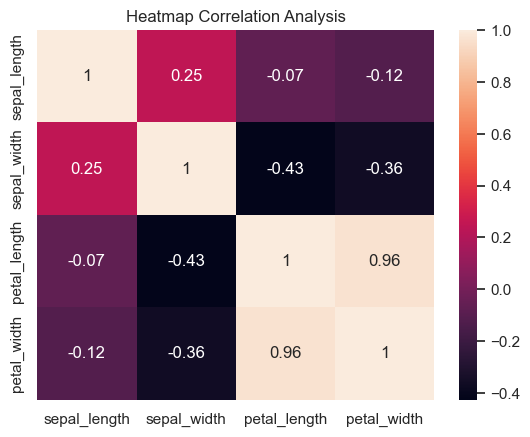

In [15]:
sns.heatmap(data=df.iloc[:, :-1].corr(), annot=True)
plt.title('Heatmap Correlation Analysis')
plt.show()

# Pairplot Analysis

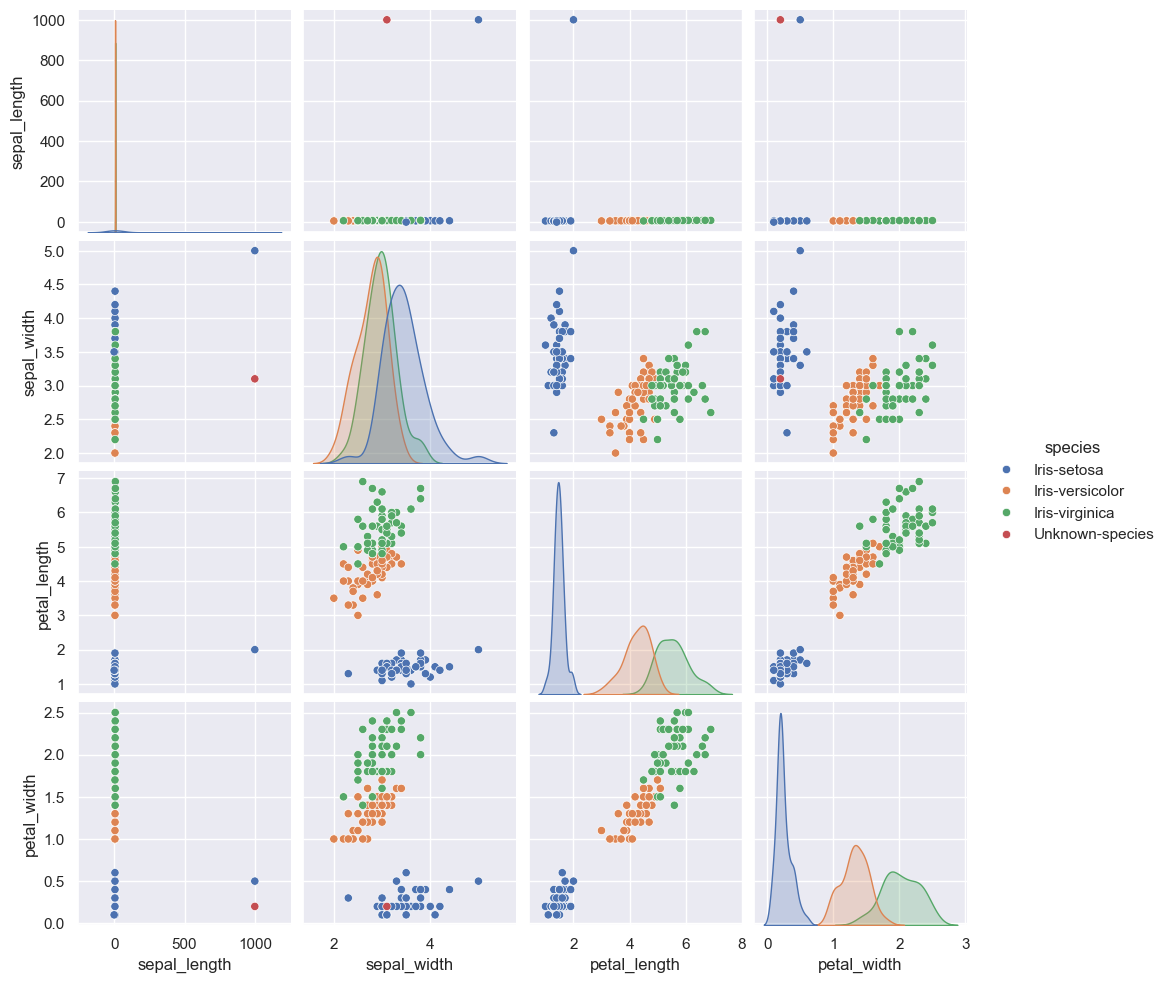

In [16]:
sns.pairplot(data=df, vars=df.iloc[:, :-1], hue='species')

# Piechart Analysis

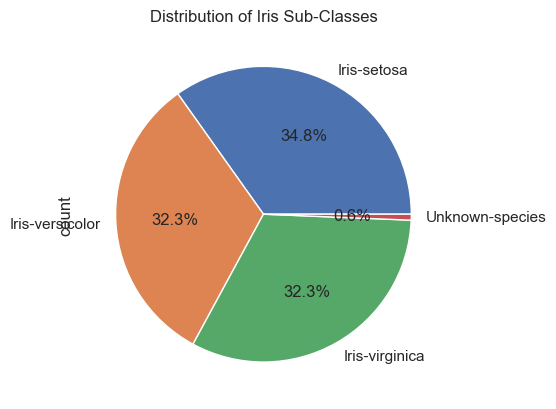

In [17]:
df['species'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Iris Sub-Classes')
plt.show()

In [18]:
df['species'].value_counts()

species
Iris-setosa        54
Iris-versicolor    50
Iris-virginica     50
Unknown-species     1
Name: count, dtype: int64

# Barplot and Boxplot Analysis
- barplot line above the bar indicate error bar
- boxplot h line inside the box is the q2
- boxplot v and h line outside the box is outlier in the range of 1.5
- boxplot dots are outliers

<Axes: xlabel='species', ylabel='sepal_length'>

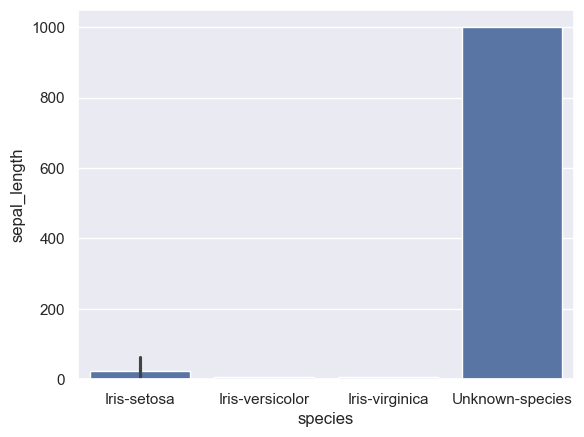

In [19]:
sns.barplot(x='species', y='sepal_length', data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

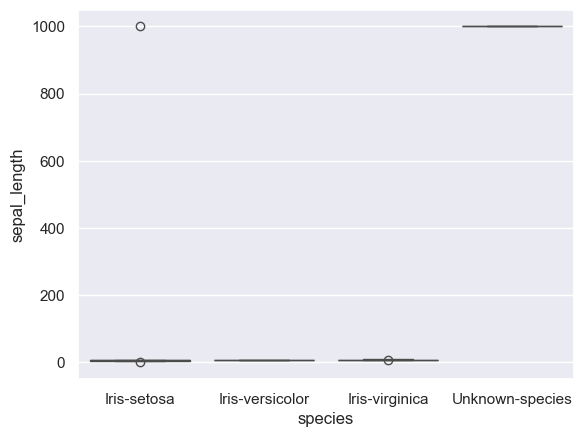

In [20]:
sns.boxplot(x='species', y='sepal_length', data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

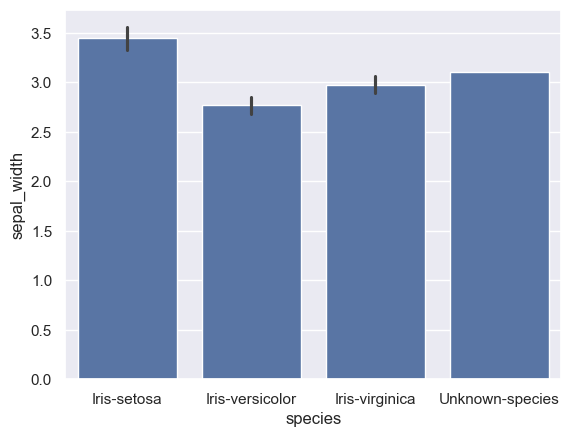

In [21]:
sns.barplot(x='species', y='sepal_width', data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

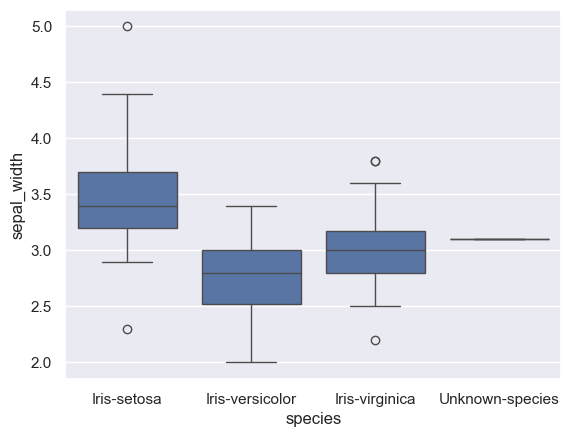

In [22]:
sns.boxplot(x='species', y='sepal_width', data=df)

<Axes: xlabel='species', ylabel='petal_length'>

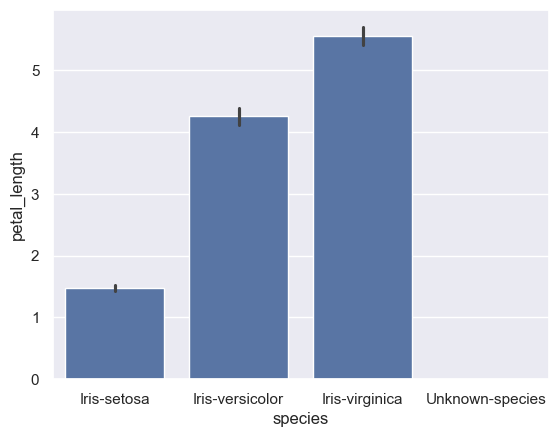

In [23]:
sns.barplot(x='species', y='petal_length', data=df)

<Axes: xlabel='species', ylabel='petal_length'>

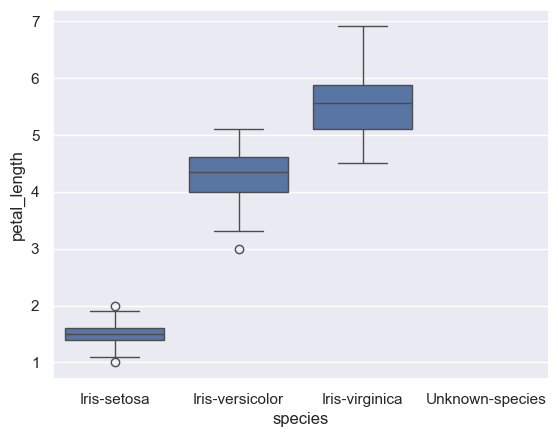

In [24]:
sns.boxplot(x='species', y='petal_length', data=df)

<Axes: xlabel='species', ylabel='petal_width'>

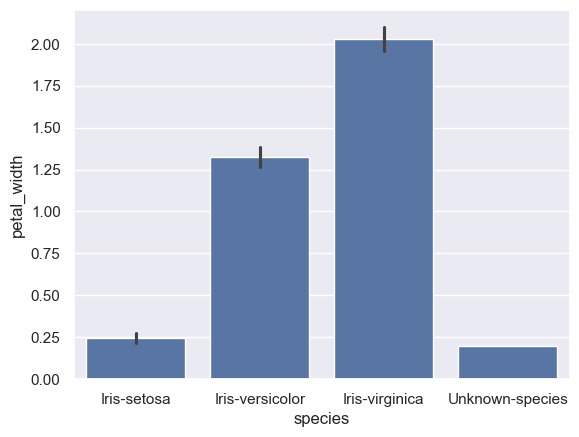

In [25]:
sns.barplot(x='species', y='petal_width', data=df)

<Axes: xlabel='species', ylabel='petal_width'>

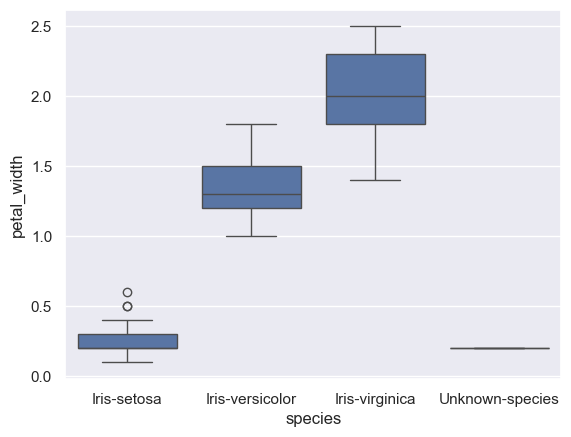

In [26]:
sns.boxplot(x='species', y='petal_width', data=df)

In [27]:
df.query("species == 'Unknown-species'")

,sepal_length,sepal_width,petal_length,petal_width,species
154,999.9,3.1,NaN,0.2,Unknown-species


#### as from above, the unknown species for features sepal_width and petal_width have normal values, but the sepal_length has really extreme value, and in the graph, petal_length didn't have the bar for unknown species because it is a NaN value

# Checking Outliers
From the analysis above, there is an extreme value in the sepal_length column, let's validate if all of the features have outliers or not?

#### we are going to check the outliers using z-score
z-score formula = data - mean / standard deviation

#### why z-score?
can be customized

In [28]:
dfNumeric = df[['sepal_length','sepal_width','petal_length','petal_width']]
for i in dfNumeric.columns:
    print()
    print(i)
    print(np.std(dfNumeric[i]))
    std = np.std(dfNumeric[i])
    mean = np.mean(dfNumeric[i])
    zscore = dfNumeric[i] - mean / std
    print(zscore)


sepal_length
112.92273179468427
0        4.933572
1        4.733572
2        4.533572
3        4.433572
4        4.833572
          ...    
150           NaN
151     -1.166428
152    999.833572
153           NaN
154    999.733572
Name: sepal_length, Length: 155, dtype: float64

sepal_width
0.45568919184925133
0     -3.238758
1     -3.738758
2     -3.538758
3     -3.638758
4     -3.138758
         ...   
150   -3.538758
151   -3.238758
152   -1.738758
153         NaN
154   -3.638758
Name: sepal_width, Length: 155, dtype: float64

petal_length
1.77048202326485
0     -0.690927
1     -0.690927
2     -0.790927
3     -0.590927
4     -0.690927
         ...   
150   -0.790927
151   -0.690927
152   -0.090927
153   -0.490927
154         NaN
Name: petal_length, Length: 155, dtype: float64

petal_width
0.7667909534450181
0     -1.323736
1     -1.323736
2     -1.323736
3     -1.323736
4     -1.323736
         ...   
150   -1.323736
151   -1.423736
152   -1.023736
153   -1.223736
154   -1.323736
Na

In [29]:
# searching for outliers using z score
outliers = []

for column in dfNumeric.columns:
    quantile_75 = dfNumeric[column].quantile(q=0.75)
    
    # Identify outliers
    outliers.append(dfNumeric[dfNumeric[column] > quantile_75+1.5])
    
# Print outlier values and the index positions
outliers

[     sepal_length  sepal_width  petal_length  petal_width
 152        1000.0          5.0           2.0          0.5
 154         999.9          3.1           NaN          0.2,
      sepal_length  sepal_width  petal_length  petal_width
 152        1000.0          5.0           2.0          0.5,
      sepal_length  sepal_width  petal_length  petal_width
 117           7.7          3.8           6.7          2.2
 118           7.7          2.6           6.9          2.3
 122           7.7          2.8           6.7          2.0,
 Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width]
 Index: []]

#### There are some outliers excluding in index 152 and 154, but we wouldn't handle that, because the data is actual, except if it is really extreme

In [30]:
df.iloc[[152,154]]

,sepal_length,sepal_width,petal_length,petal_width,species
152,1000.0,5.0,2.0,0.5,Iris-setosa
154,999.9,3.1,NaN,0.2,Unknown-species


#### as from above, there are 2 extreme values that we can clasify as outliers in the sepal_length feature, 
#### they are in index 152, 154
index 152: all features have normal value except sepal_length is outlier
index 154: sepal_width and petal_width have normal values but petal_length is NaN and sepal_length is outlier

In [31]:
# checking value below 0 (anomaly)
for i in dfNumeric:
    print(i)
    print(df[df[i].map(lambda x:x < 0)])

sepal_length
     sepal_length  sepal_width  petal_length  petal_width      species
151          -1.0          3.5           1.4          0.1  Iris-setosa
sepal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
petal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
petal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


\n\n\n




# Interpretation EDA

1. The dtypes of petal_length is object because there's an 'invalid' value
2. From the description of the dataset, sepal_length has the min value -1 and max value 1000, which is weird
3. 2 missing values in sepal length 
4. 1 missing value in sepal width
5. 3 duplicated rows

##### correlation
- good correlation = linear, increasing or decreasing together
- bad correlation = opposite
1. Good correlation: petal length and petal width
2. Bad Correlation: sepal width with petal length and petal width

##### pairplot
1. extreme values in iris-setosa sepal_length
2. iris-setosa has good distribution / separation from other subclasses 
3. iris-versicolor and iris-virginica are sort of overlapped with one another (may lead to harder prediction)

##### species
1. There is one unknown-species in species

##### outliers
1. There are 2 outliers in sepal_length
2. 1 outlier in iris-setosa
3. 1 outlier in unknown-species

##### anomaly
1. There is a value below 0 in sepal_length


# DATA PRE-PROCESSING

### What Should Be Manipulated?

- Handling outliers
- Handling negative value
- Handling missing values
- Handling duplicated values
- Data normalisation (if needed)

Missing Values Handling Method:
drop, mean, median, mode

Duplicated Values Handling Method:
drop

Outliers Handling:
Investigating the causes of outliers
⁠⁠Outlier treatment: remove, tranform, treat as missing value

Anomaly handling (negative value):
turning it into mean

In [32]:
# Handling Missing Values 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# checking the total of the missing values
for i in dfNumeric.columns:
    print(df[df[i].isnull()])

     sepal_length  sepal_width  petal_length  petal_width      species
150           NaN          3.2           1.3          0.2  Iris-setosa
153           NaN          NaN           1.6          0.3  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width      species
153           NaN          NaN           1.6          0.3  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width          species
154         999.9          3.1           NaN          0.2  Unknown-species
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [34]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
150,True,False,False,False,False
151,False,False,False,False,False
152,False,False,False,False,False
153,True,True,False,False,False


### Handling OUTLIERS

#### we are going to handle the outliers first, so that when we want to handle the missing values we wouldn't have to use the median, we can use the mean instead

- mean: suitable for continous numerical data, but sensitive to outliers
- median: robust with the outliers, but didn't represent the average of the values

##### handling the outliers by turning it into NaN first, and then we handle it later (in the next step)


In [35]:
# checking the outliers (it is in index 152 and 154)
df.loc[[152, 154]]

,sepal_length,sepal_width,petal_length,petal_width,species
152,1000.0,5.0,2.0,0.5,Iris-setosa
154,999.9,3.1,NaN,0.2,Unknown-species


In [36]:
# transforming the outliers into nan values
df.at[152, 'sepal_length'] = np.nan
df.at[154, 'sepal_length'] = np.nan

In [37]:
#checking the anomaly (negative value)
for i in dfNumeric.columns:
    print(df[df[i].map(lambda x:x < 0)], '\n')
    
# it is in the index 151

     sepal_length  sepal_width  petal_length  petal_width      species
151          -1.0          3.5           1.4          0.1  Iris-setosa 

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: [] 

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: [] 

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: [] 



### Handling Negative Value

In [38]:
# tranforming the anomaly (negative value) into nan values
df.at[151, 'sepal_length'] = np.nan

##### METHOD OF HANDLING MISSING VALUES
- tranform from NaN to mean based on the species

### Handling Missing Values

In [39]:
df.isnull().sum()

sepal_length    5
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [40]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,3.2,1.3,0.2,Iris-setosa
151,NaN,3.5,1.4,0.1,Iris-setosa
152,NaN,5.0,2.0,0.5,Iris-setosa
153,NaN,NaN,1.6,0.3,Iris-setosa
154,NaN,3.1,NaN,0.2,Unknown-species


#### let's handle unknown-species first by droping it
- why? It wouldn't effect the dataset, because it is only one row

In [41]:
#handling unknown-species
df.drop(index=154, inplace=True)

In [42]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,3.2,1.3,0.2,Iris-setosa
151,NaN,3.5,1.4,0.1,Iris-setosa
152,NaN,5.0,2.0,0.5,Iris-setosa
153,NaN,NaN,1.6,0.3,Iris-setosa


In [43]:
df.isnull().sum()

sepal_length    4
sepal_width     1
petal_length    0
petal_width     0
species         0
dtype: int64

#### now we have:
- 4 missing values in sepal_length
- 1 missing value in sepal_width
- 1 missing value in petal_length


#### let's handle missing values by tranforming to mean based their species

In [44]:
# grouping mean for each features based on their species
mean_sepal_length = df.groupby('species')['sepal_length'].mean()
mean_sepal_width = df.groupby('species')['sepal_width'].mean()
mean_petal_length = df.groupby('species')['petal_length'].mean()
mean_petal_width = df.groupby('species')['petal_width'].mean()

In [45]:
print(mean_sepal_length, mean_sepal_width, mean_petal_length, mean_petal_width)

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64 species
Iris-setosa        3.445283
Iris-versicolor    2.770000
Iris-virginica     2.974000
Name: sepal_width, dtype: float64 species
Iris-setosa        1.472222
Iris-versicolor    4.260000
Iris-virginica     5.552000
Name: petal_length, dtype: float64 species
Iris-setosa        0.246296
Iris-versicolor    1.326000
Iris-virginica     2.026000
Name: petal_width, dtype: float64


In [46]:
# tranfrom missing values to mean in sepal_length (iris_setosa)
df['sepal_length'].fillna(mean_sepal_length['Iris-setosa'], inplace=True)

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_2687/2945899417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal_length'].fillna(mean_sepal_length['Iris-setosa'], inplace=True)


In [47]:
# tranfrom missing values to mean in sepal_width (iris_setosa)
df['sepal_width'].fillna(mean_sepal_width['Iris-setosa'], inplace=True)

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_2687/4057109261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal_width'].fillna(mean_sepal_width['Iris-setosa'], inplace=True)


In [48]:
# tranfrom missing values to mean in sepal_width (iris_setosa)
df['petal_length'].fillna(mean_petal_length['Iris-setosa'], inplace=True)

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_2687/524996191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['petal_length'].fillna(mean_petal_length['Iris-setosa'], inplace=True)


In [49]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.900,3.000000,5.1,1.8,Iris-virginica
150,5.006,3.200000,1.3,0.2,Iris-setosa
151,5.006,3.500000,1.4,0.1,Iris-setosa
152,5.006,5.000000,2.0,0.5,Iris-setosa
153,5.006,3.445283,1.6,0.3,Iris-setosa


### Handling Duplicated Values

In [50]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

0

In [53]:
# because there are many changes, let's reset the index and drop the old index column
df.reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500000,1.4,0.2,Iris-setosa
1,4.900,3.000000,1.4,0.2,Iris-setosa
2,4.700,3.200000,1.3,0.2,Iris-setosa
3,4.600,3.100000,1.5,0.2,Iris-setosa
4,5.000,3.600000,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,5.900,3.000000,5.1,1.8,Iris-virginica
147,5.006,3.200000,1.3,0.2,Iris-setosa
148,5.006,3.500000,1.4,0.1,Iris-setosa
149,5.006,5.000000,2.0,0.5,Iris-setosa


In [54]:
df.shape

(151, 5)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   151 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    float64
 4   species       151 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.1+ KB


### Spliting Train and Test Dataset

In [56]:
#shuffling dataset
df = df.sample(frac=1) #frac=1 means returning the whole dataset
df

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
...,...,...,...,...,...
8,4.4,2.9,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
74,6.4,2.9,4.3,1.3,Iris-versicolor


In [57]:
# splitting the train and test dataset by 70% and 30%
ratio = 0.70

total_rows = df.shape[0] #picking the rows
train_size = int(ratio * total_rows)

train = df[0:train_size]
test = df[train_size:]

In [58]:
train.shape

(105, 5)

In [59]:
test.shape

(46, 5)

In [60]:
print(train, test)

     sepal_length  sepal_width  petal_length  petal_width          species
117           7.7          3.8           6.7          2.2   Iris-virginica
114           5.8          2.8           5.1          2.4   Iris-virginica
40            5.0          3.5           1.3          0.3      Iris-setosa
55            5.7          2.8           4.5          1.3  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica
..            ...          ...           ...          ...              ...
64            5.6          2.9           3.6          1.3  Iris-versicolor
56            6.3          3.3           4.7          1.6  Iris-versicolor
60            5.0          2.0           3.5          1.0  Iris-versicolor
14            5.8          4.0           1.2          0.2      Iris-setosa
57            4.9          2.4           3.3          1.0  Iris-versicolor

[105 rows x 5 columns]      sepal_length  sepal_width  petal_length  petal_width          species
5

### Assigning and Picking The Features for Independent and Dependent Variables
Objective: to seperate the independent features to support the process of predicting dependent variables
- Independent (X) includes sepal_length, sepal_width, petal_length and petal_width
- Dependent (y) includes species only

In [61]:
# training dataset asigning
X_train, y_train = np.array(train.drop(columns=['species'])), np.array(train['species'])

# testing dataset asigning
X_test, y_test = np.array(test.drop(columns=['species'])), np.array(test['species'])

#changing it to array because it cannot be processed if it is in the form of dataframe

In [80]:
def splitting(data, ratio, target):
	data = data.sample(frac=1)
	
	total_rows = data.shape[0] #picking the rows
	train_size = int(ratio * total_rows)

	train = data[0:train_size]
	test = data[train_size:]

	# training dataset assigning
	X_train, y_train = np.array(train.drop(columns=[target])), np.array(train[target])

	# testing dataset asigning
	X_test, y_test = np.array(test.drop(columns=[target])), np.array(test[target])	

	return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = splitting(df, 0.80, 'species')

# MODELLING
- Euclidean distance ##function##
- Get the top 3 nearest neighbor ##function##
- Predict the most frequent species function##
- Assigning the variables
- See the accuracy 
- Predict with new data point

#### why using Euclidean distance?
- Simple and uses linear concept

#### why using knn?
- Suitable for continous numerical data
- Suitable for classification
- Because there are three subclasses

### Euclidean Distance
#### objective: to see the distance between the testing data points with all of the training data points
- Variables used:
X_train, X_test, y_train, y_test, point1, point2, test_instance, k

In [ ]:
class irisPrediction:
	def __init__(self, X_train, y_train, X_test, y_test, k):
		self.X_train = X_train
		self.y_train = y_train
		self.X_test = X_test
		self.y_test = y_test
		self.k = k



	def euclidean_distance(self, point1, point2):
		return np.sqrt(np.sum(point1 - point2) ** 2)

    
    # get the top 'k' nearest neighbors
    # test_instance will be related to each data point in X_test



	def get_neighbors(self, X_train, y_train, test_instance, k):
		distances = [] 
		
		for i in range(len(self.X_train)): # looping based on how many rows in X_train
			dist = self.euclidean_distance(test_instance, self.X_train[i]) 
			#calculationg each test_instance data point with all the X_train data points
			
			distances.append((dist, self.y_train[i]))
			#inserting the distance and the target (species)
			#because both of these will be used in the prediction function
			
		distances.sort(key=lambda x:x[0])
		#sorting the distance by ascending

		neighbors = [distances[i][1] for i in range(k)]
		# assigning the 'k' nearest neighbors 
		# example if k = 5, meaning we are getting the top 5 closest neighbors
			
		return neighbors
		# returning the 'neighbors' array 



	def predict(self, X_train, y_train, X_test, k):
		predictions = []
		
		for test_instance in X_test: #looping the X_test to get the k neighbors of each test data point
			neighbors = self.get_neighbors(self.X_train, self.y_train, test_instance, k)
			#get the k neighbors of the test_instance
			
			prediction_species = max(set(neighbors), key=neighbors.count)
			#get the most frequent species out of all the 'k' neighbors
			
			predictions.append(prediction_species)
			#inserting the most frequent species to the predict 
			
		return predictions
		#returning the predict list



	# Making accuracy prediction by percentage
	def accuracy(self, y_true, y_pred):
		correct = np.sum(y_true == y_pred)
		return correct / len(y_true) * 100


	
	def predict_single(self, X_train, y_train, new_instance, k):
		# Get the neighbors for this new instance
		neighbors = self.get_neighbors(self.X_train, self.y_train, new_instance, k)
		
		# Determine the most frequent species among neighbors (majority voting)
		predicted_species = max(set(neighbors), key=neighbors.count)
		return predicted_species

### Model Evaluation 
- Accuracy
- Testing new instance

#### accuracy

In [83]:
# Assigning k variable 
# Set the number of neighbors
k = 3

# Make predictions
iris_prediction = irisPrediction(X_train, y_train, X_test, y_test, k)
y_pred = iris_prediction.predict(X_train, y_train, X_test, k)

# Calculate accuracy
acc = iris_prediction.accuracy(y_test, y_pred)
print(f'Accuracy: {acc:.2f}%')

print("Predictions on test set:", y_pred, '\n\n')
print("y test set:", y_test, '\n\n')
print("y test and y pred comparison:", y_pred == y_test, '\n\n')

Accuracy: 83.87%
Predictions on test set: ['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'] 


y test set: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'I

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
137,6.4,3.1,5.5,1.8,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
...,...,...,...,...,...
118,7.7,2.6,6.9,2.3,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor


### Creating New Instance

In [ ]:
# printing the result
new_instance = np.array([5.7, 2.6, 3.5, 1])

# Predict the class for the new instance
predicted_species = irisPrediction.predict_single(X_train, y_train, new_instance, k)
print("Predicted species for the new instance:", predicted_species)

Predicted species for the new instance: Iris-versicolor


### checking again before exporting

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df = df.sort_index()

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.7,3.3,5.7,2.5,Iris-virginica
1,4.6,3.1,1.5,0.2,Iris-setosa
2,6.4,3.1,5.5,1.8,Iris-virginica
3,6.7,3.0,5.0,1.7,Iris-versicolor
4,5.0,2.0,3.5,1.0,Iris-versicolor
...,...,...,...,...,...
146,7.7,2.6,6.9,2.3,Iris-virginica
147,6.2,2.8,4.8,1.8,Iris-virginica
148,4.7,3.2,1.6,0.2,Iris-setosa
149,5.5,2.5,4.0,1.3,Iris-versicolor


In [ ]:
df.to_csv('clean_dataset.csv')

In [ ]:
cleandf = pd.read_csv('clean_dataset.csv')

In [ ]:
cleandf				

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,6.7,3.3,5.7,2.5,Iris-virginica
1,1,4.6,3.1,1.5,0.2,Iris-setosa
2,2,6.4,3.1,5.5,1.8,Iris-virginica
3,3,6.7,3.0,5.0,1.7,Iris-versicolor
4,4,5.0,2.0,3.5,1.0,Iris-versicolor
...,...,...,...,...,...,...
146,146,7.7,2.6,6.9,2.3,Iris-virginica
147,147,6.2,2.8,4.8,1.8,Iris-virginica
148,148,4.7,3.2,1.6,0.2,Iris-setosa
149,149,5.5,2.5,4.0,1.3,Iris-versicolor


# Exporting Model

In [ ]:
# we are using tensorflow keras to export our model into H5 file
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Example model
model = Sequential([
    Dense(64, activation='relu', input_shape=(32,)),
    Dense(10, activation='softmax')
])

# Save the model to an H5 file
model.save('iris_model.h5')


In [ ]:
#load the model
iris_model = load_model('iris_model.h5')

In [ ]:
import pickle

with open('iris_model.pkl', 'wb') as file:
	pickle.dump(model, file)